## Fondamenti di Analisi Dati


## PCA (Principal Component Analisys)

Mira a ridurre la complessità dei dati, catturando le informazioni piu importanti.
Viene trasformato un insieme di variabili correlate (calcolata la correlazione come: "Pearson", "Kendal"...) in un insieme di variabili non correlate chiamate "Componenti Principali". Queste componenti mirano a catturare la massima **variazione dei dati**.

Formula:

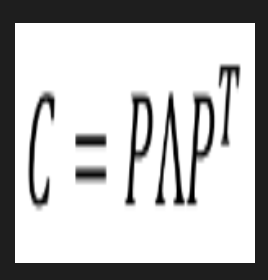



- C è la matrice di Covarianza
- P matrice le cui colonne contengono gli autovettori di C 
- /\ è la matrice diagonale che contiene gli autovalori di C 

Vengono tenuti gli autovalori che hanno valori grandi, mentre quelli piu piccoli vengono rimossi (con i rispettivi autovettori)

In [1]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer


In [2]:
dataset = load_breast_cancer()

features = dataset.data
label = dataset.target


print(features.shape)#(569,30)
print(label.shape)

(569, 30)
(569,)


In [3]:
print("features matrix:\n", features)
print("\n\n labels vector:\n", label)

features matrix:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


 labels vector:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1

In [4]:
dataset_pd = pd.DataFrame(features)

dataset_pd.columns = list(dataset.feature_names)#rinomino colonne

dataset_pd["dataset"] = label #assegno etichette


In [5]:
dataset_pd.isna().sum()

dataset_pd.dropna(inplace=True)#togliere le colonne vuote

In [6]:
print(dataset_pd)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

## Normalizzazione

In [7]:
from Normalizzator import Normalizator

# StandardScaler
ss_norm = Normalizator("ss", dataset_pd)
# MinMaxScaler
mm_norm = Normalizator("mm", dataset_pd)
# MaxAbsScaler
ma_norm = Normalizator("ma", dataset_pd)
# RobustScaler
rs_norm = Normalizator("rs", dataset_pd, (0.1, 0.9))

In [8]:
from Covarianzer import Covarianzer

ss_cov = Covarianzer(ss_norm.data)
mm_cov = Covarianzer(mm_norm.data)
ma_cov = Covarianzer(ma_norm.data)
rs_cov = Covarianzer(rs_norm.data)

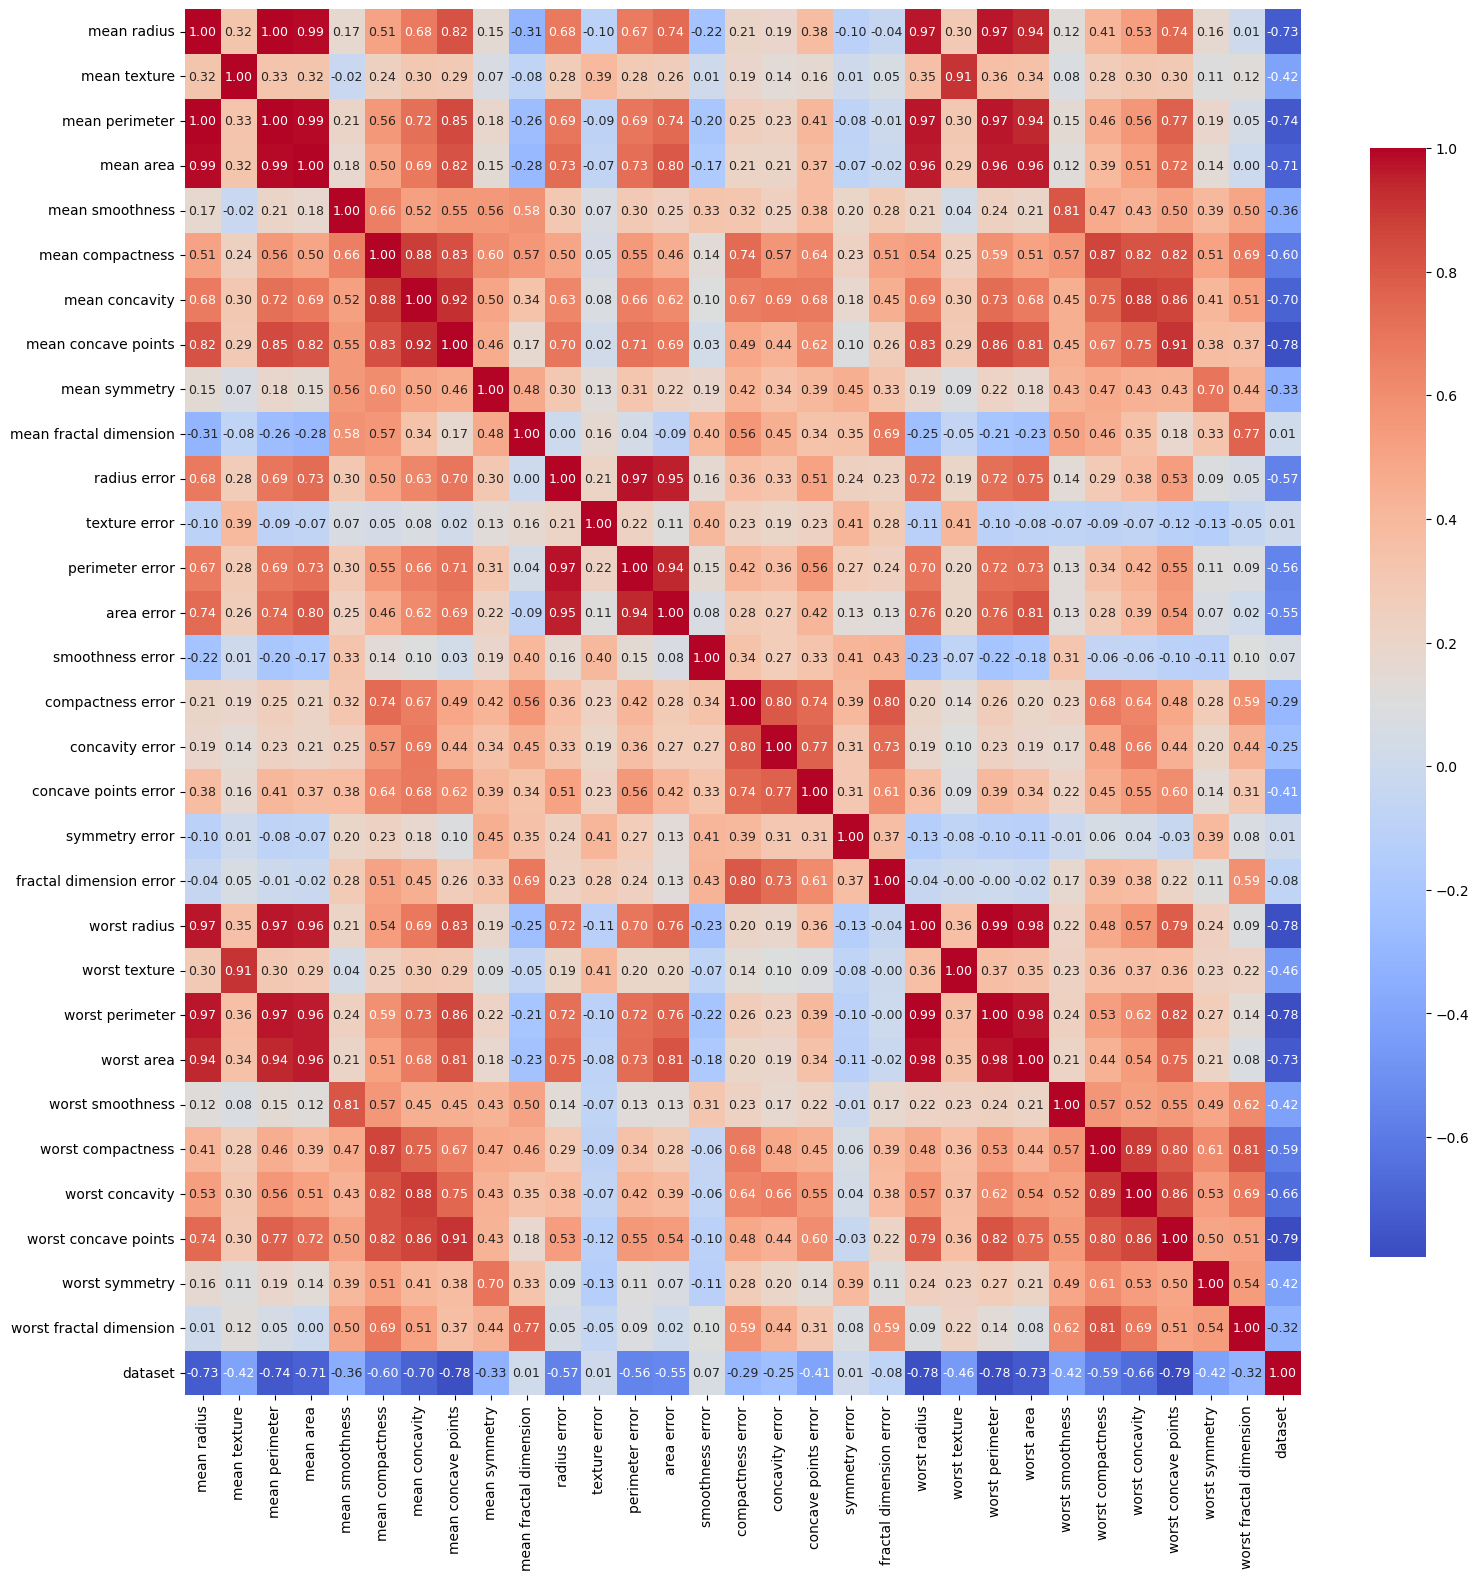

In [9]:
ss_cov.cov_heatmap()

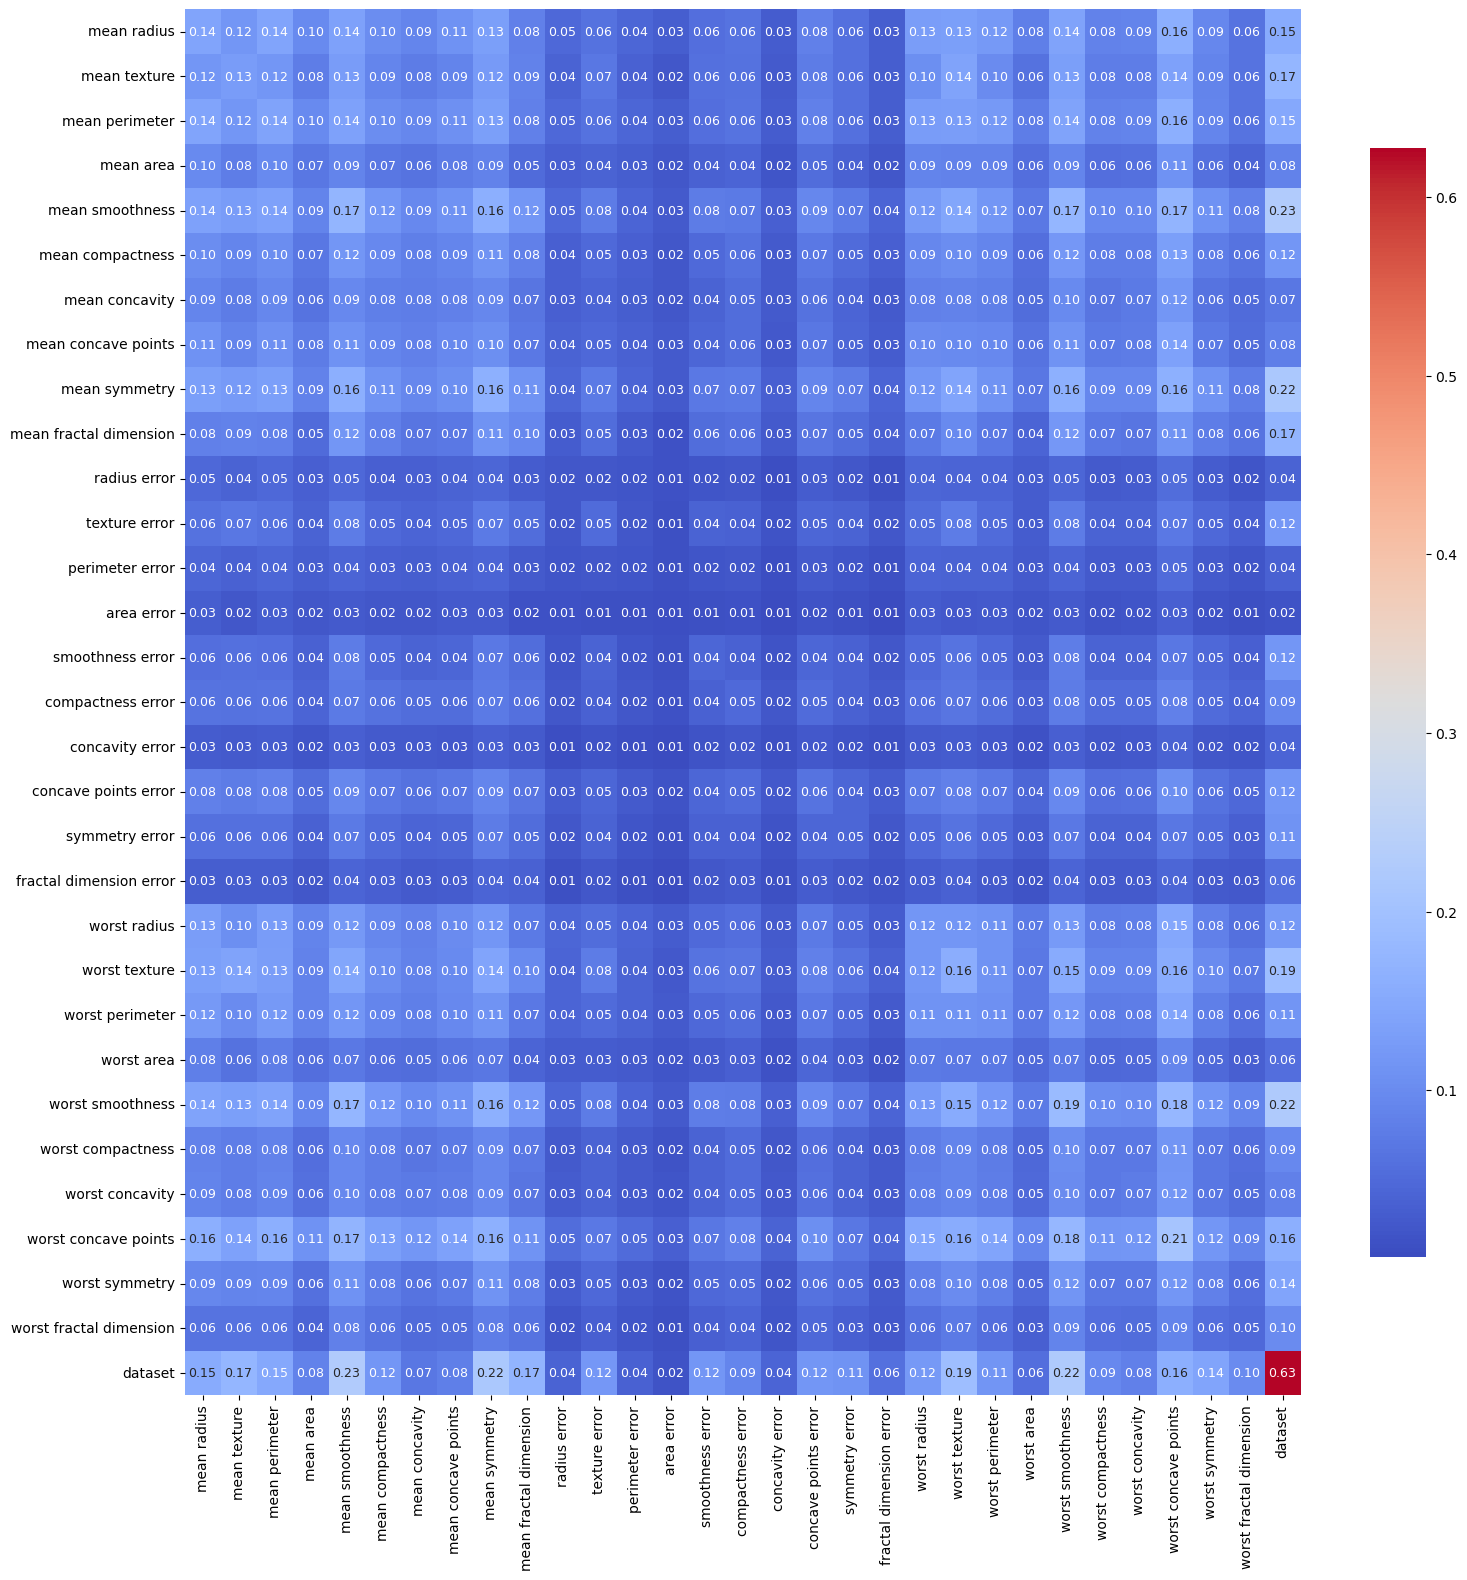

In [10]:
mm_cov.cov_heatmap()

In [11]:
from Correlator import Correlator

ss_cor_pr = Correlator(ss_norm.data, "pr")

In [13]:
from sklearn.decomposition import PCA 
from Utilities import scatter_generation

pca_breast = PCA(n_components=2)
pca_breatest_cancer = pca_breast.fit_transform(ss_norm.data.values)
pca_breatest_cancer_Df = pd.DataFrame(
    pca_breatest_cancer,
    columns = ["Principal Component 1", "Principal Component 2"]
) 

In [14]:
pca_breatest_cancer_Df

,Principal Component 1,Principal Component 2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579
...,...,...
564,6.593983,-3.454947
565,4.024833,-3.556006
566,1.530077,-1.958871
567,10.405008,1.849078


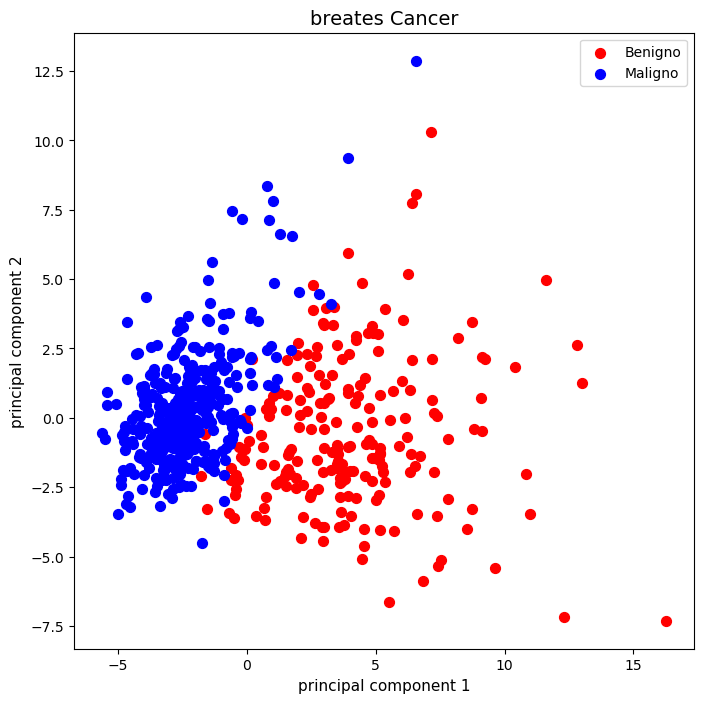

In [16]:
target = ["Benigno", "Maligno"]
color = ["Red", "Blue"]
column_df = list(pca_breatest_cancer_Df.columns)
scatter_generation("breates Cancer", target, label,pca_breatest_cancer_Df, column_df, color)